In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

# Evolution Charts

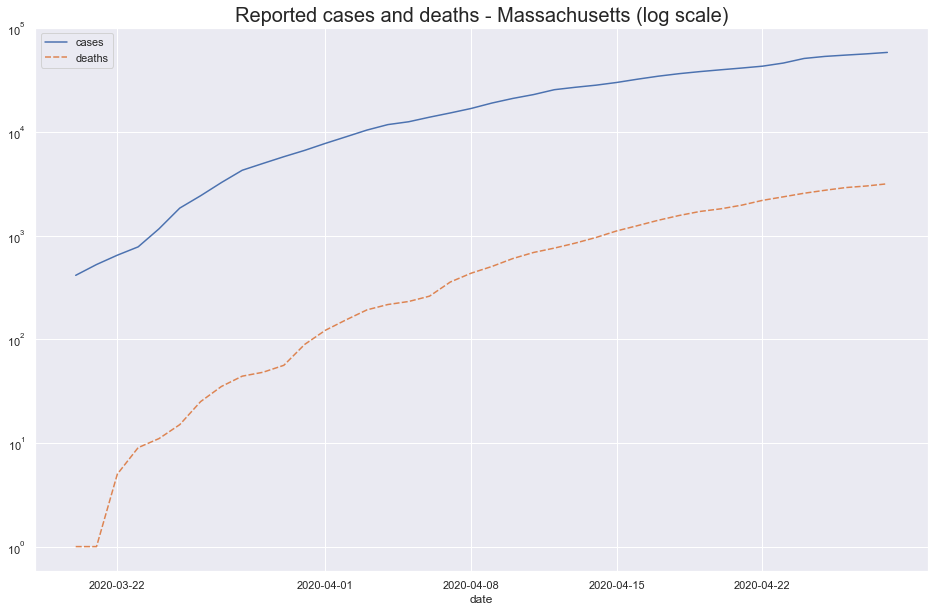

In [4]:
# plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

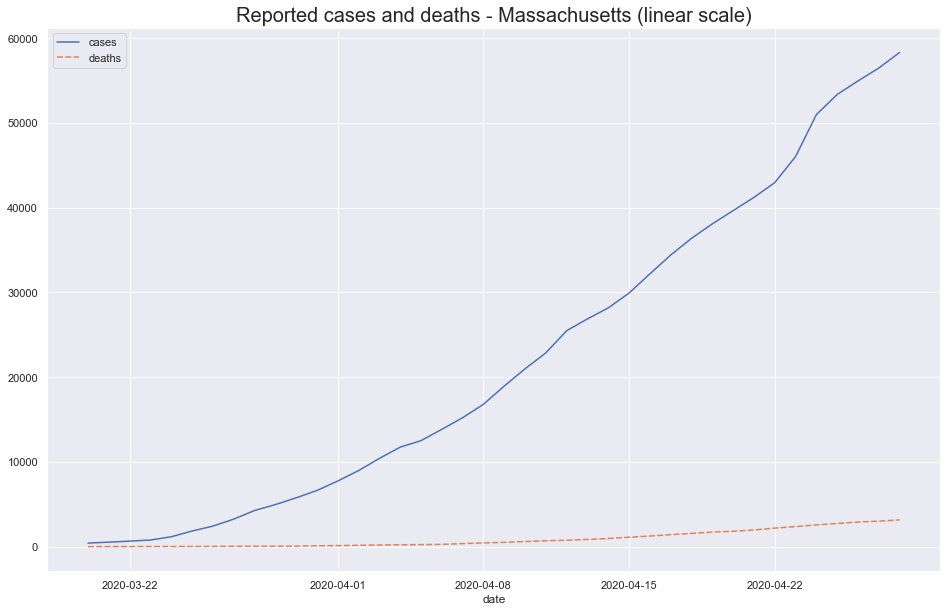

In [5]:
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

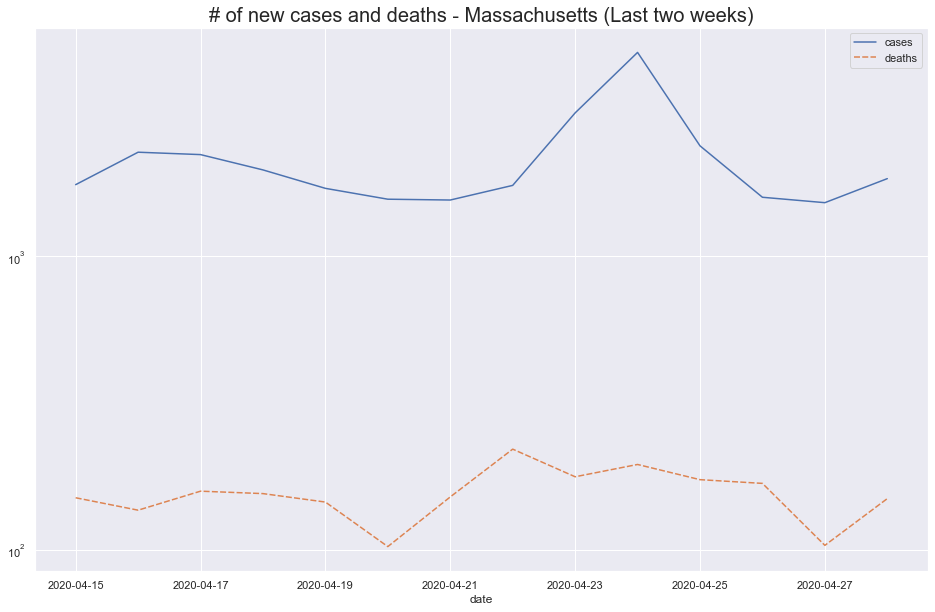

In [6]:
ax = sns.lineplot(data=cases_df.diff().iloc[-14:])
ax.set_yscale("log")

plt.title("# of new cases and deaths - Massachusetts (Last two weeks)")

plt.show()

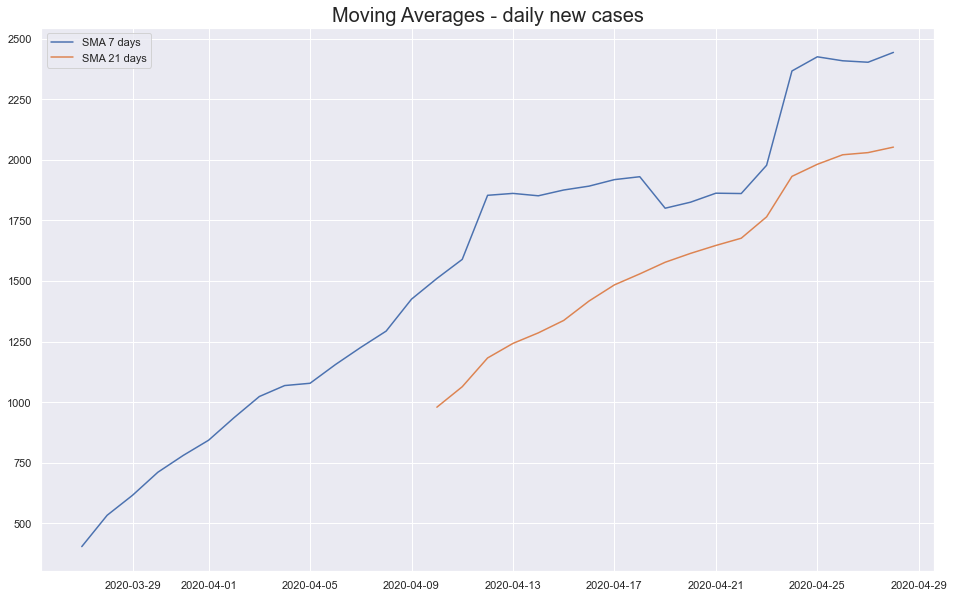

In [7]:
plt.plot(smas["cases_SMA_7"], label="SMA 7 days")
plt.plot(smas["cases_SMA_21"], label="SMA 21 days")
plt.legend(loc=2)
plt.title("Moving Averages - daily new cases")
plt.show()

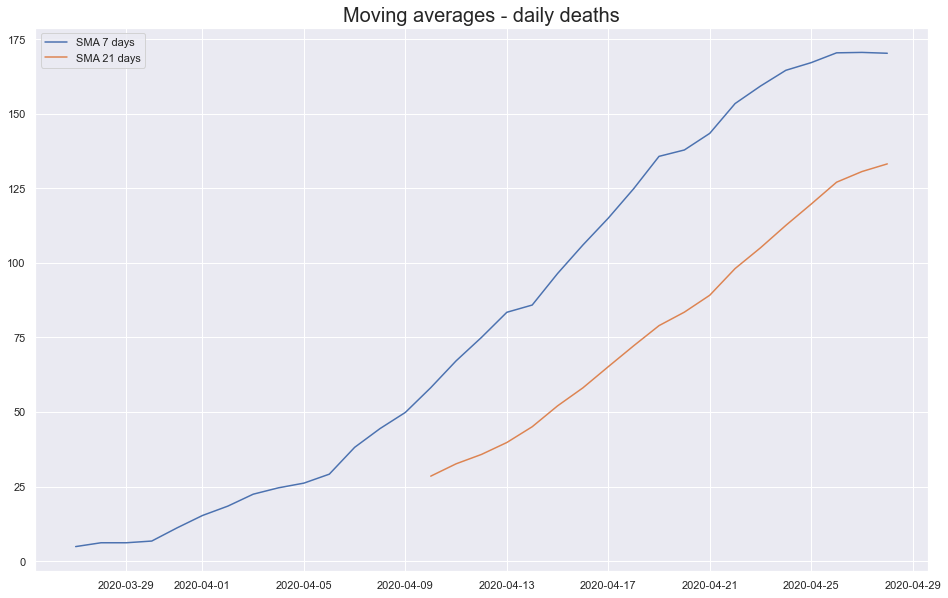

In [8]:
plt.plot(smas["deaths_SMA_7"], label="SMA 7 days")
plt.plot(smas["deaths_SMA_21"], label="SMA 21 days")
plt.legend(loc=2)
plt.title("Moving averages - daily deaths")
plt.show()

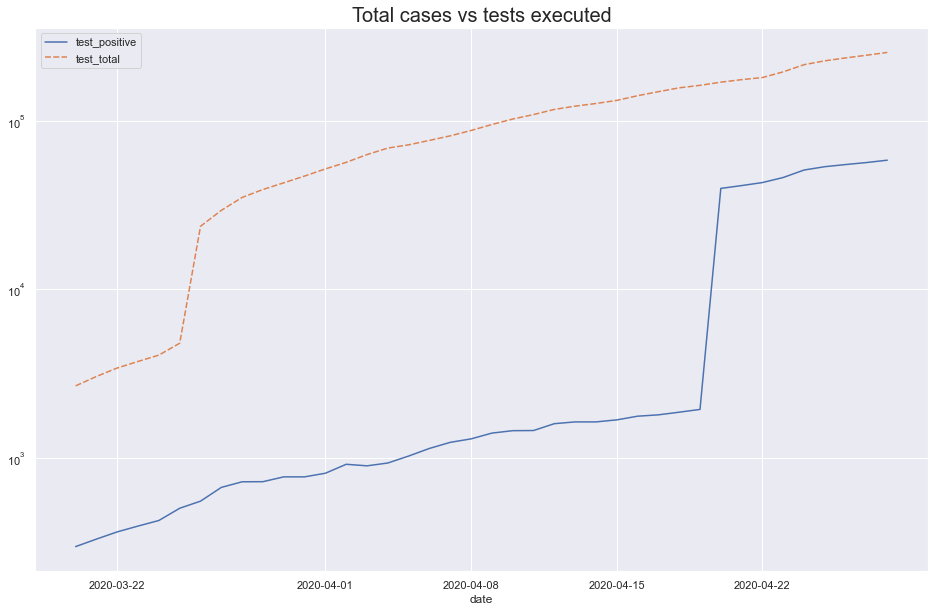

In [9]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [10]:

evolution_df.iloc[-7:]

,cases,deaths,test_total
date,,,
2020-04-22,1745.0,221.0,5090.0
2020-04-23,3079.0,178.0,14614.0
2020-04-24,4946.0,196.0,20137.0
2020-04-25,2379.0,174.0,11632.0
2020-04-26,1590.0,169.0,9255.0
2020-04-27,1524.0,104.0,8787.0
2020-04-28,1840.0,150.0,9613.0


## Daily percent change

In [11]:
percentage_changes = df.pct_change().iloc[-7:]

for column in percentage_changes.columns:
    percentage_changes[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in percentage_changes[column]], index = percentage_changes.index)
    
percentage_changes

,cases,deaths,test_positive,test_total
date,,,,
2020-04-22,4.24%,11.27%,4.24%,2.90%
2020-04-23,7.17%,8.16%,7.17%,8.10%
2020-04-24,10.75%,8.31%,10.75%,10.32%
2020-04-25,4.67%,6.81%,4.67%,5.40%
2020-04-26,2.98%,6.19%,2.98%,4.08%
2020-04-27,2.77%,3.59%,2.77%,3.72%
2020-04-28,3.26%,5.00%,3.26%,3.93%
